#**Автоматический градиент**

In [15]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# w - параметр, который мы будем обучать -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)


In [16]:
# Forward шаг
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)


tensor(1., grad_fn=<PowBackward0>)


In [17]:
# backward шаг
loss.backward()
print(w.grad)


tensor(-2.)


In [18]:
# Обновление веса
with torch.no_grad():
    w -= 0.01 * w.grad
    print(w)
# не забываем обнулить градиенты
w.grad.zero_()

tensor(1.0200, requires_grad=True)


tensor(0.)

#**Линейная регрессия**

Дан набор данных точек $\{ (x_1, t_1), (x_2, t_2), \dots, (x_N, t_N) \}$, где каждая точка $(x_i, t_i)$ содержит *значение входа* $x_i$ и *значение выхода* $t_i$. 

Используем следующую  **модель**:
$$
y_i = wx_i + b
$$

Мы хотим, чтобы ответы $y_i$ были максимально близко к реальным значениям $t_i$. Для линейной регрессии мы используем квадрат ошибки для того, чтобы измерить расстояние (отличие) между $y_i$ и $t_i$. **loss function** для этого простого примера:
$$
\mathcal{L}(y_i,t_i) = \frac{1}{2} (y_i - t_i)^2
$$

**Cost function** - это средний loss (ошибка) на всем множестве данных:
$$
\mathcal{E}(w,b) = \frac{1}{N} \sum_{i=1}^N \mathcal{L}(y_i, t_i) = \frac{1}{N} \sum_{i=1}^N \frac{1}{2} \left(wx_i + b - t_i \right)^2
$$

Мы генерируем синтетические данные {(xi,ti)}  где  xi  равномерно распределено на интервале  [0,10]  а  ti  созданы с помощью уравнение ( w=4  и  b=10 ):
ti=4xi+10+ϵ 

Здесь,  ϵ∼N(0,2)  ( ϵ  получено из Гауссовского распределения со средним значением 0 и дисперсией 2). Шум вносит некоторые случайные колебания в данные, для имитации реальых данных, которые имеют исходную закономерность, но отдельные наблюдения искажены случайным шумом.

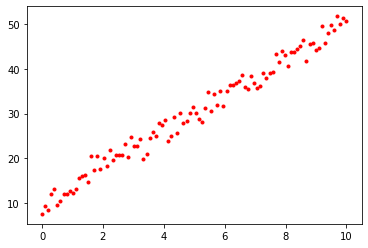

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

N = 100  # Number of training data points
x = np.linspace(0, 10, N)

t = 4 * x + 10 + np.random.normal(0, 2, x.shape[0])
plt.plot(x, t, "r.")

x = torch.from_numpy(x)
t = torch.from_numpy(t)

In [20]:
params = {
    "w": torch.randn(1).requires_grad_(True),
    "b": torch.randn(1).requires_grad_(True),
}


def cost(params):
    y = params["w"] * x + params["b"]
    return (1 / N) * torch.sum(0.5 * (y - t) ** 2)


# Находим градиент
num_epochs = 1000  # Количество эпох 1000,2000
alpha = 0.01  # Learning rate

for i in range(num_epochs):
    # Оценка градиента текущих параметров, хранящихся в params
    loss = cost(params)
    loss.backward()

    if i % 100 == 0:
        print(f"i: {i} loss: {loss.item():.4f}")

    # Обновление параметров w и b
    with torch.no_grad():
        params["w"].data = params["w"] - alpha * params["w"].grad
        params["b"].data = params["b"] - alpha * params["b"].grad
        params["w"].grad.zero_()
        params["b"].grad.zero_()

print(params)

i: 0 loss: 563.0806
i: 100 loss: 6.7993
i: 200 loss: 4.7031
i: 300 loss: 3.4279
i: 400 loss: 2.6522
i: 500 loss: 2.1802
i: 600 loss: 1.8931
i: 700 loss: 1.7185
i: 800 loss: 1.6122
i: 900 loss: 1.5476
{'w': tensor([4.1538], requires_grad=True), 'b': tensor([9.2378], requires_grad=True)}


[4.219536]


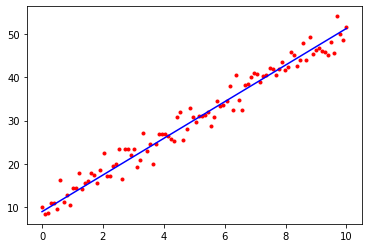

In [8]:
plt.plot(x, t, "r.")
print(params["w"].data.numpy())

b = params["b"].data.numpy()
w = params["w"].data.numpy()

plt.plot([0, 10], [b, 10*w + b], "b-")

# Регрессия: нейронные сети

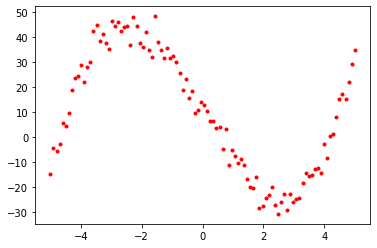

In [29]:
import numpy as np
x = np.linspace(-5, 5, 100)
t = x ** 3 - 20 * x + 10 + np.random.normal(0, 4, x.shape[0])
plt.plot(x, t, "r.")

x = torch.from_numpy(x).float()
t = torch.from_numpy(t)


tensor([[-5.0000],
        [-4.8990],
        [-4.7980],
        [-4.6970],
        [-4.5960],
        [-4.4949],
        [-4.3939],
        [-4.2929],
        [-4.1919],
        [-4.0909],
        [-3.9899],
        [-3.8889],
        [-3.7879],
        [-3.6869],
        [-3.5859],
        [-3.4848],
        [-3.3838],
        [-3.2828],
        [-3.1818],
        [-3.0808],
        [-2.9798],
        [-2.8788],
        [-2.7778],
        [-2.6768],
        [-2.5758],
        [-2.4747],
        [-2.3737],
        [-2.2727],
        [-2.1717],
        [-2.0707],
        [-1.9697],
        [-1.8687],
        [-1.7677],
        [-1.6667],
        [-1.5657],
        [-1.4646],
        [-1.3636],
        [-1.2626],
        [-1.1616],
        [-1.0606],
        [-0.9596],
        [-0.8586],
        [-0.7576],
        [-0.6566],
        [-0.5556],
        [-0.4545],
        [-0.3535],
        [-0.2525],
        [-0.1515],
        [-0.0505],
        [ 0.0505],
        [ 0.1515],
        [ 0.

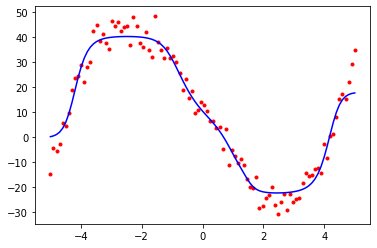

In [33]:
inputs = x.reshape(x.shape[-1], 1)


params = {
    "W1": torch.randn(1, 4).requires_grad_(True),
    "b1": torch.randn(4).requires_grad_(True),
    "W2": torch.randn(4, 4).requires_grad_(True),
    "b2": torch.randn(4).requires_grad_(True),
    "W3": torch.randn(4, 1).requires_grad_(True),
    "b3": torch.randn(1).requires_grad_(True),
}

print(inputs)
# Оптимизация (в этом примере используется SGD).
optimizer = torch.optim.SGD(params.values(), lr=0.0001, weight_decay=0.0001, momentum=0.9)

# В Pytorch также реализован широкий спектр функций активации, таких как: Tanh, ReLU, LeakyReLU, ...
nonlinearity = torch.nn.ReLU()


def predict(params, inputs):
    h1 = nonlinearity(torch.mm(inputs, params["W1"]) + params["b1"])
    h2 = nonlinearity(torch.mm(h1, params["W2"]) + params["b2"])
    output = torch.mm(h2, params["W3"]) + params["b3"]
    return output


def cost(params):
    output = predict(params, inputs)
    return (1.0 / inputs.shape[0]) * torch.sum(0.5 * (output.reshape(output.shape[0]) - t) ** 2)

print(cost(params))

num_epochs = 10000

for i in range(num_epochs):
    # Оценка градиента текущих параметров, хранящихся в params
    loss = cost(params)
    if i % 500 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    final_y = predict(params, inputs)
    plt.plot(x, t, "r.")
    plt.plot(x, final_y, "b-")